<a href="https://colab.research.google.com/github/sohamkhatod/Data-Science-Project/blob/main/DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial data

In [ ]:
#downloading and extracting dataset
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar

!tar -xvf VOCtrainval_11-May-2012.tar

Streaming output truncated to the last 5000 lines.
VOCdevkit/VOC2012/SegmentationClass/2008_001874.png
VOCdevkit/VOC2012/SegmentationClass/2008_001876.png
VOCdevkit/VOC2012/SegmentationClass/2008_001882.png
VOCdevkit/VOC2012/SegmentationClass/2008_001885.png
VOCdevkit/VOC2012/SegmentationClass/2008_001895.png
VOCdevkit/VOC2012/SegmentationClass/2008_001896.png
VOCdevkit/VOC2012/SegmentationClass/2008_001926.png
VOCdevkit/VOC2012/SegmentationClass/2008_001966.png
VOCdevkit/VOC2012/SegmentationClass/2008_001971.png
VOCdevkit/VOC2012/SegmentationClass/2008_001992.png
VOCdevkit/VOC2012/SegmentationClass/2008_001997.png
VOCdevkit/VOC2012/SegmentationClass/2008_002032.png
VOCdevkit/VOC2012/SegmentationClass/2008_002043.png
VOCdevkit/VOC2012/SegmentationClass/2008_002064.png
VOCdevkit/VOC2012/SegmentationClass/2008_002066.png
VOCdevkit/VOC2012/SegmentationClass/2008_002067.png
VOCdevkit/VOC2012/SegmentationClass/2008_002073.png
VOCdevkit/VOC2012/SegmentationClass/2008_002079.png
VOCdevkit/VOC

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from tensorflow import keras
import tensorflow as tf
import tensorflow_datasets as tfds
import cv2
import PIL
from IPython.display import clear_output
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from PIL import Image
import os
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
path = '/content/VOCdevkit/VOC2012'

In [ ]:
def list_creator(path_file):
  path_file = path_file.read().split()

  final_list = []
  for i in range(len(path_file)):
    t = os.path.join(path,'SegmentationClass',path_file[i] + '.png')
    final_list.append([os.path.join(path,'JPEGImages',path_file[i] + '.jpg'),t])
  return final_list

In [ ]:
# training data
train_list = open(os.path.join(path,'ImageSets','Segmentation','train.txt'))
train_list = list_creator(train_list)

train_list[0]

['/content/VOCdevkit/VOC2012/JPEGImages/2007_000032.jpg',
 '/content/VOCdevkit/VOC2012/SegmentationClass/2007_000032.png']

In [ ]:
# validation data
Val_list = open(os.path.join(path,'ImageSets','Segmentation','val.txt'))

Val_list = list_creator(Val_list)
Val_list[0]

['/content/VOCdevkit/VOC2012/JPEGImages/2007_000033.jpg',
 '/content/VOCdevkit/VOC2012/SegmentationClass/2007_000033.png']

In [ ]:
classes = ['Background','aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car ', 'cat', 'chair', 'cow', 'Dining Table', 'dog', 'horse', 'motorbike', 'person', 'potted plant', 'sheep', 'sofa', 'train', 'tv/monitor']

# Data preprocessing and pipelining

(333, 500, 3)


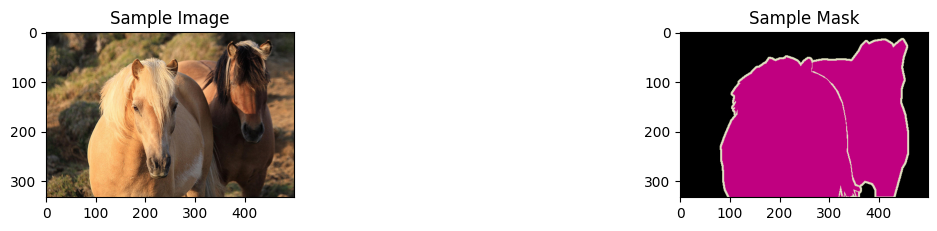

In [ ]:
def show_image(path):
  plt.figure(figsize = (15,15))
  plt.subplot(6,2,1)
  img = Image.open(path[0])
  plt.imshow(img)
  plt.title('Sample Image')
  plt.subplot(6,2,2)
  mask = Image.open(path[1])
  plt.title('Sample Mask')
  plt.imshow(mask)
  print(np.array(img).shape)

sample_index = np.random.randint(low = 0,high = len(train_list))
show_image(train_list[sample_index])

In [ ]:
Img_Width,Img_Height = 224,224
num_classes = 21

In [ ]:
# Shuffling of data
train_list = tf.random.shuffle(train_list)
Val_list = tf.random.shuffle(Val_list)
train_list

<tf.Tensor: shape=(1464, 2), dtype=string, numpy=
array([[b'/content/VOCdevkit/VOC2012/JPEGImages/2009_004464.jpg',
        b'/content/VOCdevkit/VOC2012/SegmentationClass/2009_004464.png'],
       [b'/content/VOCdevkit/VOC2012/JPEGImages/2009_001972.jpg',
        b'/content/VOCdevkit/VOC2012/SegmentationClass/2009_001972.png'],
       [b'/content/VOCdevkit/VOC2012/JPEGImages/2007_006477.jpg',
        b'/content/VOCdevkit/VOC2012/SegmentationClass/2007_006477.png'],
       ...,
       [b'/content/VOCdevkit/VOC2012/JPEGImages/2008_007142.jpg',
        b'/content/VOCdevkit/VOC2012/SegmentationClass/2008_007142.png'],
       [b'/content/VOCdevkit/VOC2012/JPEGImages/2009_001802.jpg',
        b'/content/VOCdevkit/VOC2012/SegmentationClass/2009_001802.png'],
       [b'/content/VOCdevkit/VOC2012/JPEGImages/2011_002553.jpg',
        b'/content/VOCdevkit/VOC2012/SegmentationClass/2011_002553.png']],
      dtype=object)>

In [ ]:
train_list = tf.data.Dataset.from_tensor_slices(train_list)
Val_list = tf.data.Dataset.from_tensor_slices(Val_list)

In [ ]:
def PreProcess_Mask_Img(Instance):

  Img = Image.open(Instance[0].numpy())
  Img = Img.resize((Img_Width,Img_Height),resample = Image.BILINEAR)
  Img = np.asarray(Img)

  Mask = Image.open(Instance[1].numpy())
  Mask = Mask.resize((Img_Width,Img_Height),resample = Image.BILINEAR)
  Mask = np.asarray(Mask)



  Normalization = tf.keras.layers.experimental.preprocessing.Rescaling(1./255,dtype=np.float16)
  return Normalization(Img),Mask

In [ ]:
# Data Augmentation
class Augment(tf.keras.layers.Layer):
  def __init__(self, seed=42):
    super().__init__()
    # both use the same seed, so they'll make the same random changes.
    self.augment_inputs = tf.keras.layers.RandomFlip(mode="horizontal", seed=seed)
    self.augment_labels = tf.keras.layers.RandomFlip(mode="horizontal", seed=seed)

  def call(self, inputs, labels):
    inputs = self.augment_inputs(inputs)

    # increasing dimmension to 224,224,1 because flip requires 3 dimmensions
    labels = self.augment_labels(labels[..., tf.newaxis])

    #decreasing dimension back to 224,224
    labels = tf.squeeze(labels)
    return inputs, labels

In [ ]:
def Preprocess(Instance):
  Img,Mask = tf.py_function(PreProcess_Mask_Img,[Instance],[tf.float16,tf.float16])
  Img.set_shape((Img_Width, Img_Height, 3))  # Specify the shape of the image
  Mask.set_shape(( Img_Width, Img_Height ))  # Specify the shape of the mask
  return tf.ensure_shape(Img,[None,None,3]),tf.ensure_shape(Mask,[None,None])

def DataLoader(dataset,BATCH_SIZE = 32,BUFFER_SIZE = 32):
  data = dataset.map(Preprocess,num_parallel_calls = tf.data.AUTOTUNE)
  data = data.map(Augment())
  data = data.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat(1)
  data = data.prefetch(buffer_size = tf.data.AUTOTUNE)
  return data


In [ ]:
# Batch size is the number of examples used in one training example.
# It is mostly a power of 2
BATCH_SIZE = 32
BUFFER_SIZE = 32


width, height = 224, 224

Train = DataLoader(train_list, BATCH_SIZE, BUFFER_SIZE)
Val = DataLoader(Val_list, BATCH_SIZE, BUFFER_SIZE)


# Shape of Input = 224,224,3
# Shape of Mask = 224,224

# Display

In [ ]:
def print_21(t,mul = True):
  if mul:
    t = (np.array(t)*255).astype(int)
  else:
    t = np.array(t).astype(int)
  plt.figure(figsize=(15, 15))
  count = 1
  temp ={0}
  for i in range(21):
    t2 = []
    flag = False
    for j in range(len(t)):
      t3 = []
      for k in range(len(t[j])):
        temp.add(int(t[j][k]))
        if t[j][k] == i:
          t3.append(1)
          flag = True
        else:
          t3.append(0)
      t2.append(t3)
    if not flag:
      continue

    plt.subplot(4, 6, count)
    plt.title(classes[i])
    plt.imshow(t2)
    #plt.show()
    count +=1
  print(f"classes in pred = {temp}")

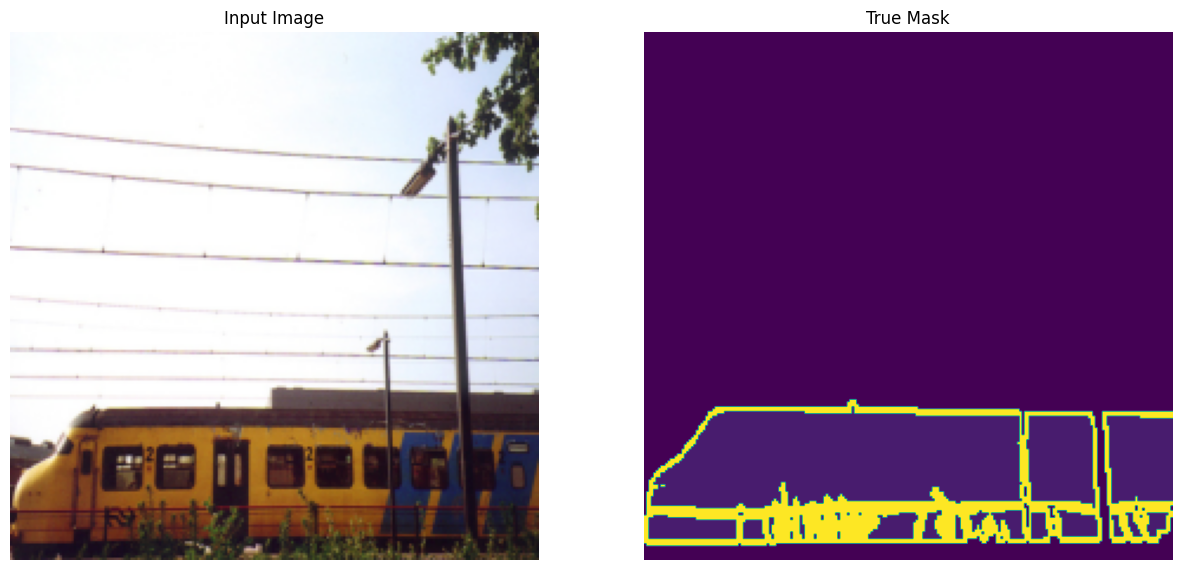

classes in pred = {0, 19, 255}


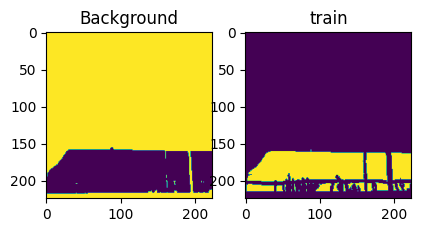

In [ ]:
def display_images(display_list,mul = False):
	plt.figure(figsize=(15, 15))
	title = ['Input Image', 'True Mask',
			'Predicted Mask']

	for i in range(len(display_list)):
		plt.subplot(1, len(display_list), i+1)
		plt.title(title[i])
		if i == 2:
			plt.imshow(np.array(display_list[i]))
		else:
			plt.imshow((np.array(display_list[i])*255).astype(int))
		plt.axis('off')

	plt.show()

	print_21(display_list[len(display_list)-1],mul)


for img, mask in Train.take(1):
	sample_image, sample_mask = img[0], mask[0]
	display_list = sample_image, sample_mask

display_images(display_list)


# Model training

In [ ]:
# Hyperparameters
EPOCHS = 150
# for early stopping
Patience = 5

In [ ]:
import matplotlib.pyplot as plt
def model_summary(history,model_no=1):
    plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.plot(history.epoch, history.history["loss"], label="Train loss")
    plt.plot(history.epoch, history.history["val_loss"], label="Valid loss")
    plt.legend()
    plt.subplot(132)
    plt.plot(history.epoch, history.history["accuracy"], label="Train accuracy")
    plt.plot(history.epoch, history.history["val_accuracy"], label="Valid accuracy")
    plt.legend()
    plt.subplot(133)
    if model_no == 1:
      plt.plot(history.epoch, history.history["mean_io_u"], label="Train Mean iou")
      plt.plot(history.epoch, history.history["val_mean_io_u"], label="Valid Mean iou")
    else:
      plt.plot(history.epoch, history.history["mean_io_u_"+str(model_no - 1)], label="Train Mean iou")
      plt.plot(history.epoch, history.history["val_mean_io_u_"+str(model_no - 1)], label="Valid Mean iou")
    plt.legend()
    plt.show()

In [ ]:
def create_mask(pred_mask):
	pred_mask = tf.argmax(pred_mask, axis=-1)
	return pred_mask


def show_predictions(dataset=None, num=1):
	if dataset:
		for image, mask in Train.take(num):
			pred_mask = model.predict(image)
			pred_mask = create_mask(pred_mask[0])
			display_images([image[0], mask[0], pred_mask],False)
	else:
		display_images([sample_image, sample_mask,
						create_mask(model.predict(sample_image[tf.newaxis, ...]))])



In [ ]:
class CustomCallback(keras.callbacks.Callback):
   def on_epoch_end(self, epoch, logs=None):
        keys = list(logs.keys())
        #print("End epoch {} of training; got log keys: {}".format(epoch, keys))
        #plt.title('Train')
        #show_predictions(Train)
        #plt.title('Val')
        if epoch%10 == 0:
          show_predictions(Val)
          plt.show()


# Model 1 (Currently Best)

Based on MobileNetV2 for encoder and pix2pix for decoder

Also we are using transfer learning.
>
[Source of model](https://www.tensorflow.org/tutorials/images/segmentation)

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=[224, 224, 3], include_top=False)

# Use the activations of these layers
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
base_model_outputs = [base_model.get_layer(name).output for name in layer_names]

# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=base_model_outputs)

down_stack.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
!pip install git+https://github.com/tensorflow/examples.git

  Cloning https://github.com/tensorflow/examples.git to /tmp/pip-req-build-ixxr6rql
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/examples.git /tmp/pip-req-build-ixxr6rql
  Resolved https://github.com/tensorflow/examples.git to commit 0b14ce1c88537b94772cc99d995d936417be6f5d
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-examples: filename=tensorflow_examples-0.1699471818.63262868223049538191520590201343318150499692381-py3-none-any.whl size=301553 sha256=ed3324452f477a3dd12113be1dcaf3f0ac22bd5ad8b0bfde2c90f2d468632028
  Stored in directory: /tmp/pip-ephem-wheel-cache-5nai3a56/wheels/72/5f/d0/7fe769eaa229bf20101d11a357eb23c83c481bee2d7f710599
Successfully built tensorflow-examples


In [ ]:
from tensorflow_examples.models.pix2pix import pix2pix
up_stack = [
    pix2pix.upsample(512, 3),  # 4x4 -> 8x8
    pix2pix.upsample(256, 3),  # 8x8 -> 16x16
    pix2pix.upsample(128, 3),  # 16x16 -> 32x32
    pix2pix.upsample(64, 3),   # 32x32 -> 64x64
]

In [ ]:
def unet_model(output_channels:int):
  inputs = tf.keras.layers.Input(shape=[224, 224, 3])

  # Downsampling through the model
  skips = down_stack(inputs)
  x = skips[-1]
  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    concat = tf.keras.layers.Concatenate()
    x = concat([x, skip])

  # This is the last layer of the model
  last = tf.keras.layers.Conv2DTranspose(
      filters=output_channels, kernel_size=3, strides=2,
      padding='same')  #64x64 -> 128x128

  x = last(x)
  x = tf.keras.layers.Activation('softmax')(x)
  return tf.keras.Model(inputs=inputs, outputs=x)

In [ ]:
MeanIou = tf.keras.metrics.MeanIoU( 21, sparse_y_pred = False, ignore_class =	255)

In [ ]:
Early_Stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=Patience)

In [ ]:
OUTPUT_CLASSES = 21


model = unet_model(output_channels=OUTPUT_CLASSES)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(ignore_class=255),
              metrics=['accuracy',MeanIou])

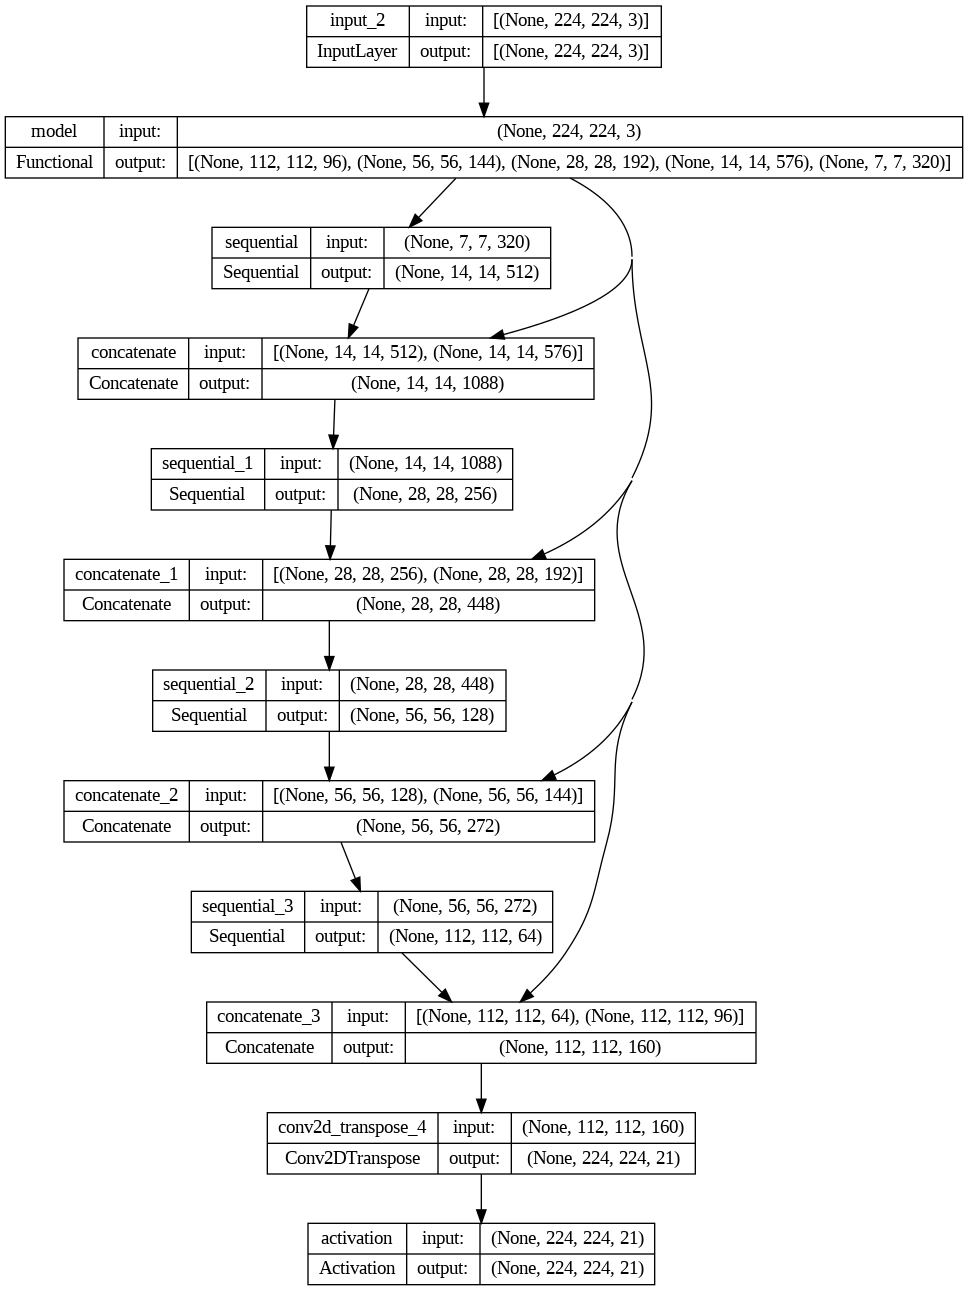

In [ ]:
tf.keras.utils.plot_model(model,show_shapes = True)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 model (Functional)          [(None, 112, 112, 96),       1841984   ['input_2[0][0]']             
                              (None, 56, 56, 144),                                                
                              (None, 28, 28, 192),                                                
                              (None, 14, 14, 576),                                                
                              (None, 7, 7, 320)]                                                  
                                                                                            

# Model Training

1/1 [==============================] - 6s 6s/step


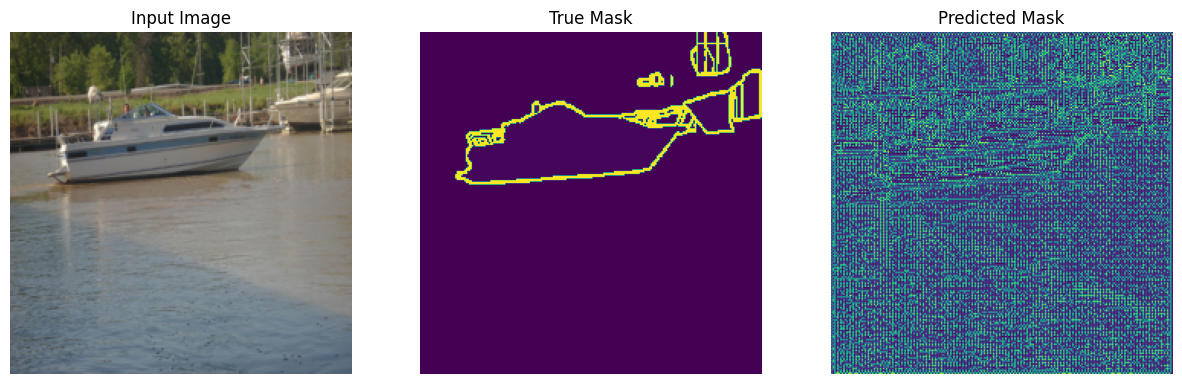

classes in pred = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}


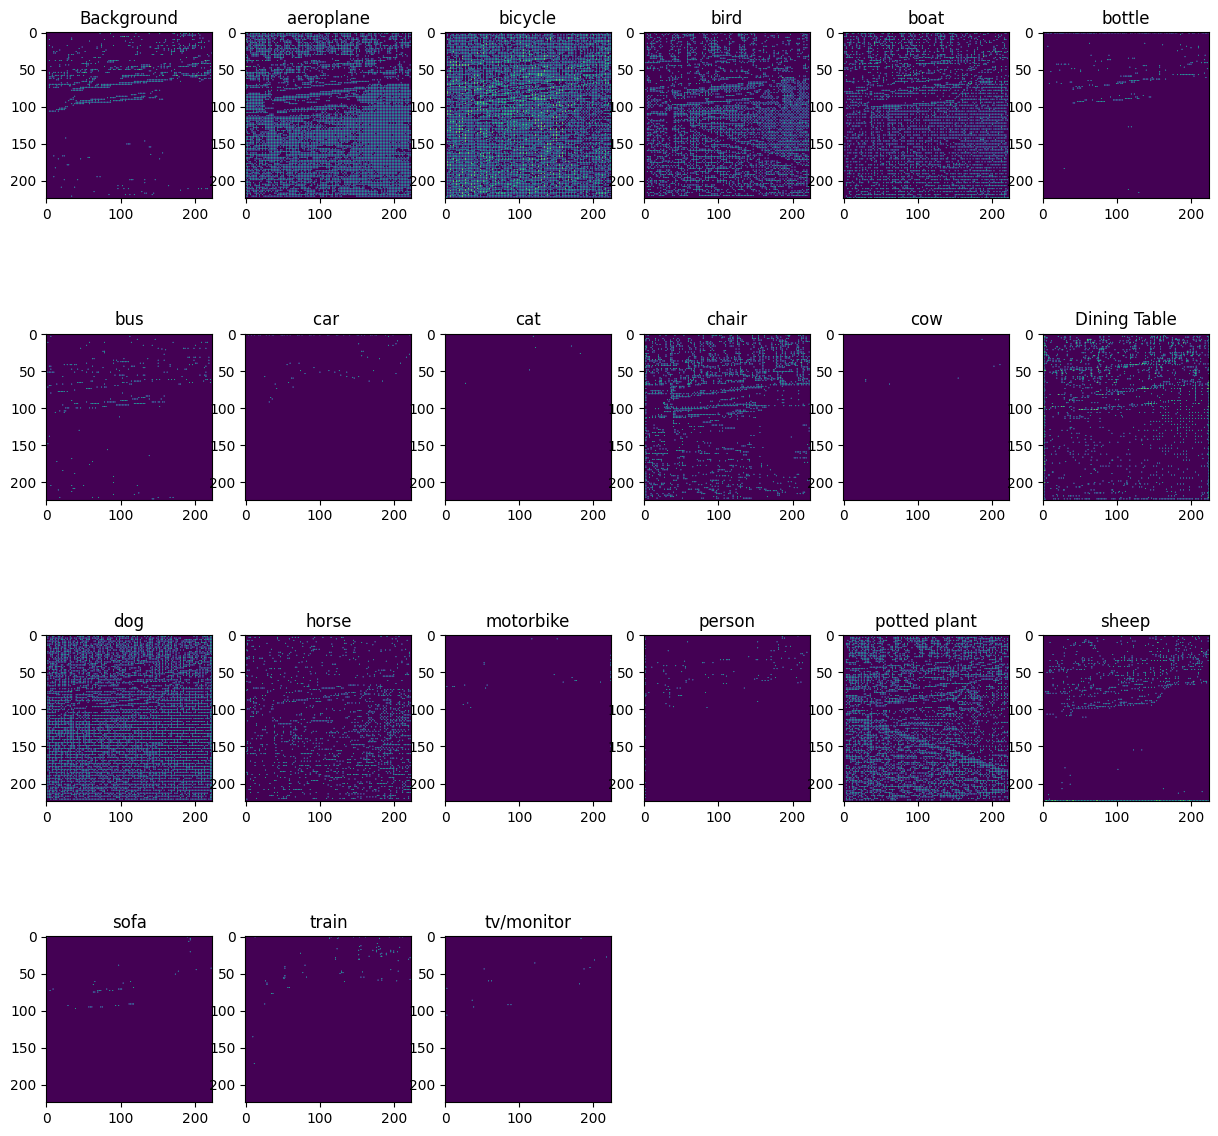

In [ ]:
show_predictions(Train)

In [ ]:
model_history = model.fit(Train, epochs=EPOCHS,
						validation_data=Val, callbacks=[CustomCallback(),Early_Stopping])

1/1 [==============================] - 0s 42ms/step


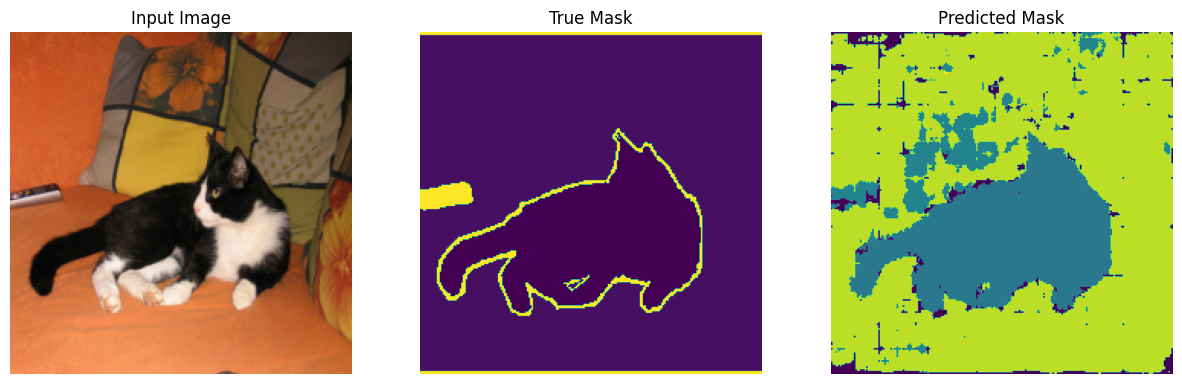

classes in pred = {0, 8, 9, 11, 12, 15, 18, 20}


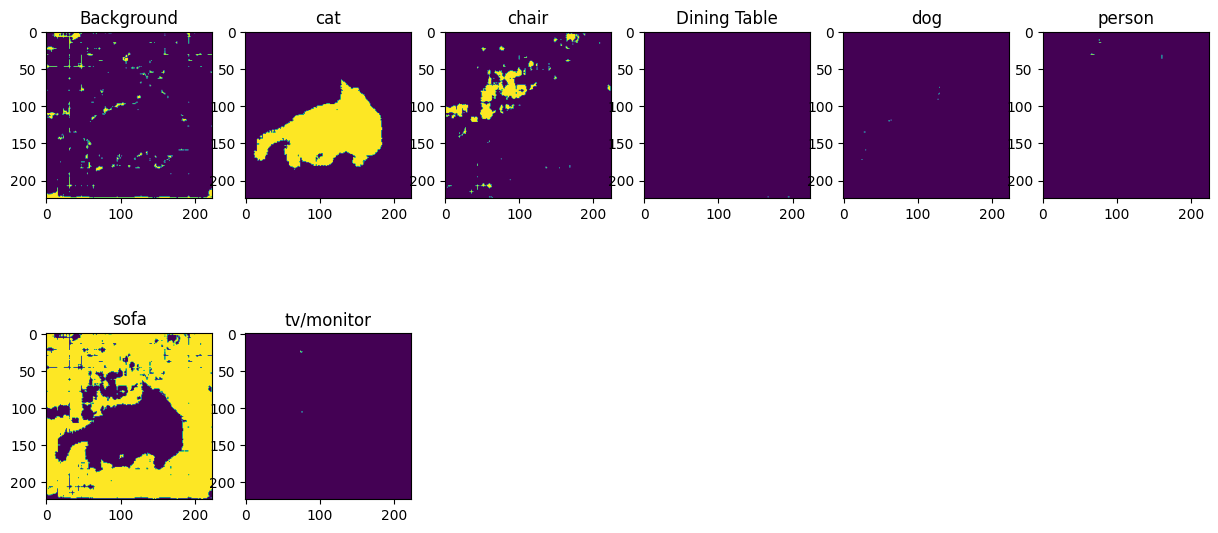

In [ ]:
show_predictions(Val)

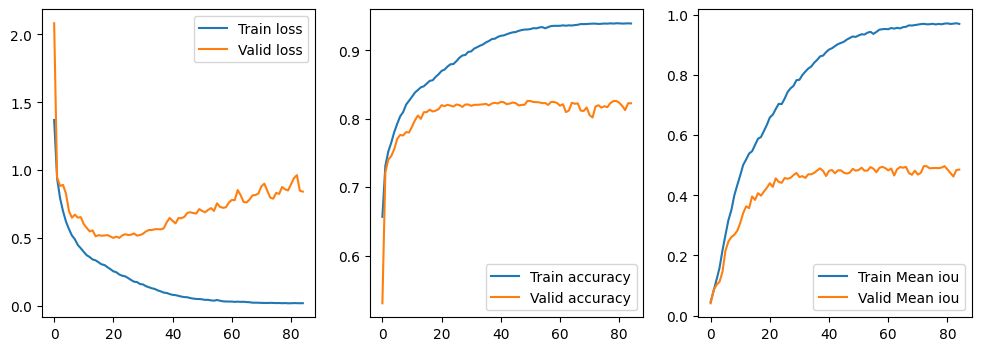

In [ ]:
model_summary(model_history,1)

# Model 2

Now following previous model we tried to change the encoder and see the difference it makes .

For encoder we selected resnet 50 and decoder is same.



In [ ]:
base_model = tf.keras.applications.resnet50.ResNet50(include_top=False, weights='imagenet', input_shape= [224,224,3])
# Use the activations of these layers
layer_names = [
    'conv1_relu',
    'conv2_block3_out',
    'conv3_block4_out',
    'conv4_block6_out',
    'conv5_block3_out',
]
base_model_outputs = [base_model.get_layer(name).output for name in layer_names]

# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=base_model_outputs)

down_stack.trainable = True

94765736/94765736 [==============================] - 0s 0us/step


We need to keep trainable = True without it val_mean_iou reaches only around 0.10



In [ ]:
from tensorflow_examples.models.pix2pix import pix2pix
up_stack = [
    pix2pix.upsample(512, 3),  # 4x4 -> 8x8
    pix2pix.upsample(256, 3),  # 8x8 -> 16x16
    pix2pix.upsample(128, 3),  # 16x16 -> 32x32
    pix2pix.upsample(64, 3),   # 32x32 -> 64x64
]

In [ ]:
def unet_model(output_channels:int):
  inputs = tf.keras.layers.Input(shape=[224, 224, 3])

  # Downsampling through the model
  skips = down_stack(inputs)
  x = skips[-1]
  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    skip = tf.keras.layers.Dropout(0.4)(skip)
    concat = tf.keras.layers.Concatenate()
    x = concat([x, skip])

  # This is the last layer of the model
  last = tf.keras.layers.Conv2DTranspose(
      filters=output_channels, kernel_size=3, strides=2,
      padding='same')  #64x64 -> 128x128

  x = last(x)
  x = tf.keras.layers.Activation('softmax')(x)
  return tf.keras.Model(inputs=inputs, outputs=x)

In [ ]:
MeanIou = tf.keras.metrics.MeanIoU( 21, sparse_y_pred = False, ignore_class =	255)

In [ ]:
Early_Stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=Patience)

In [ ]:
OUTPUT_CLASSES = 21


model = unet_model(output_channels=OUTPUT_CLASSES)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(ignore_class=255),
              metrics=['accuracy',MeanIou])

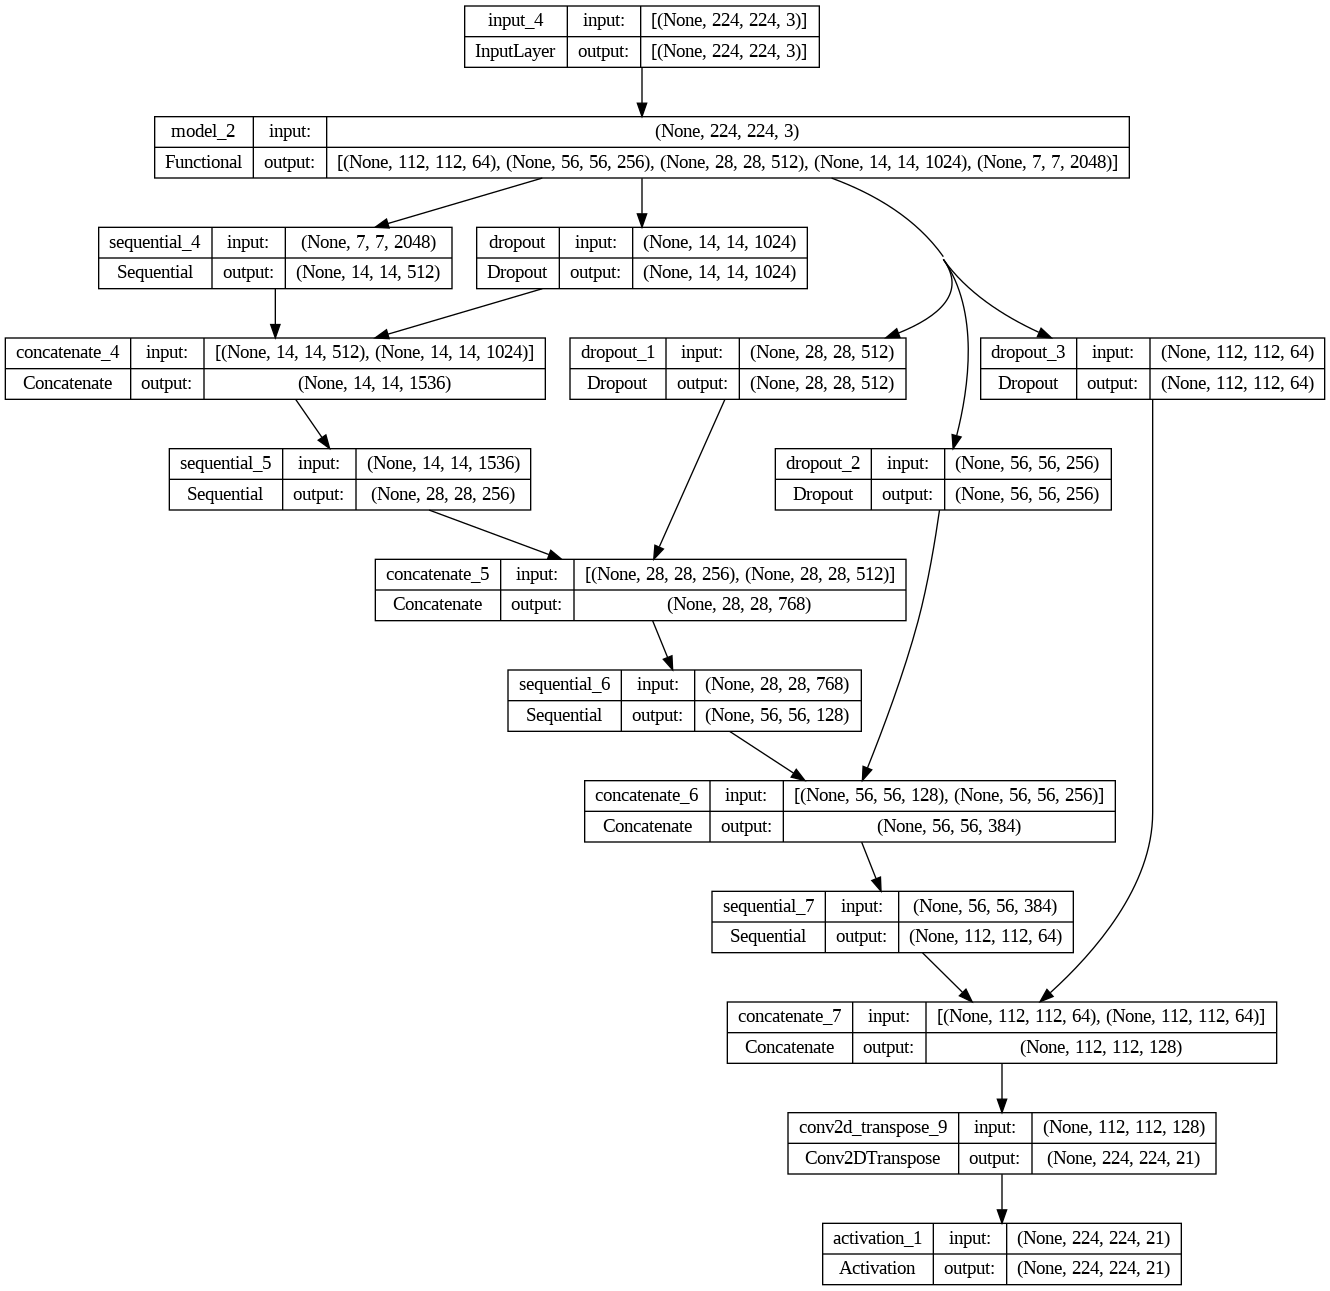

In [ ]:
tf.keras.utils.plot_model(model,show_shapes = True)

In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 model_2 (Functional)        [(None, 112, 112, 64),       2358771   ['input_4[0][0]']             
                              (None, 56, 56, 256),        2                                       
                              (None, 28, 28, 512),                                                
                              (None, 14, 14, 1024),                                               
                              (None, 7, 7, 2048)]                                                 
                                                                                            

# Training Model

1/1 [==============================] - 6s 6s/step


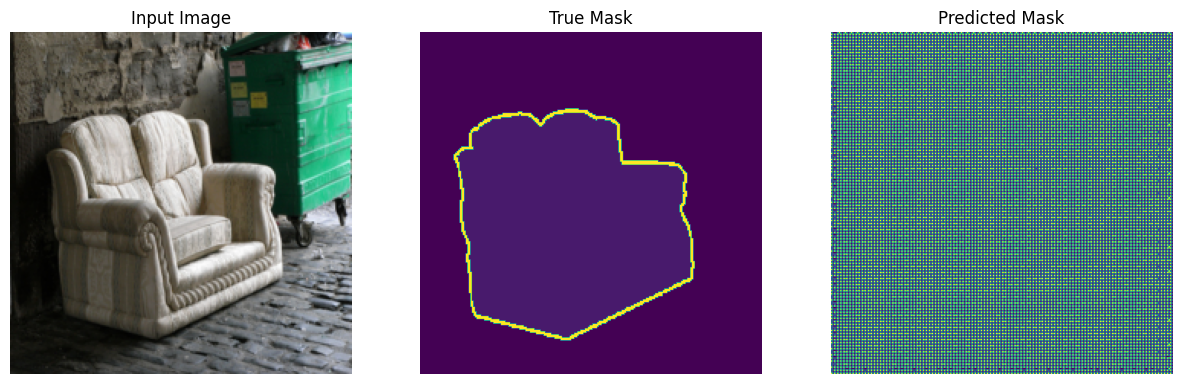

classes in pred = {0, 1, 2, 6, 7, 8, 13, 15, 19, 20}


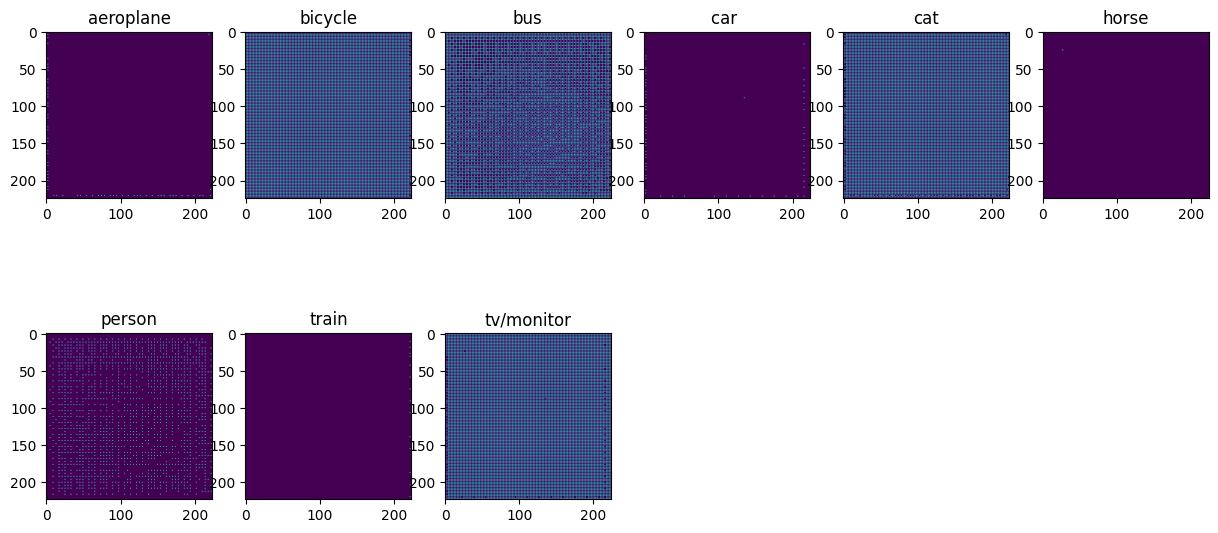

In [ ]:
show_predictions(Train)

Epoch 1/150
1/1 [==============================] - 0s 31ms/step


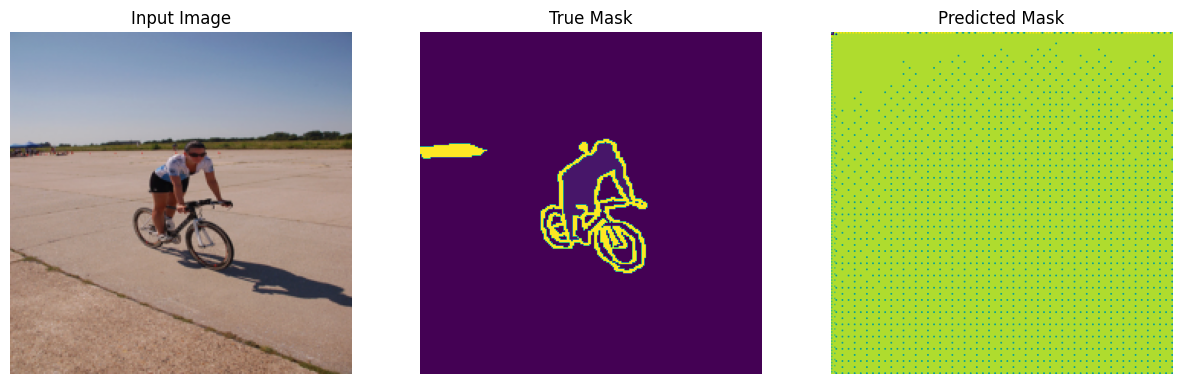

classes in pred = {0, 8, 12, 15, 17}


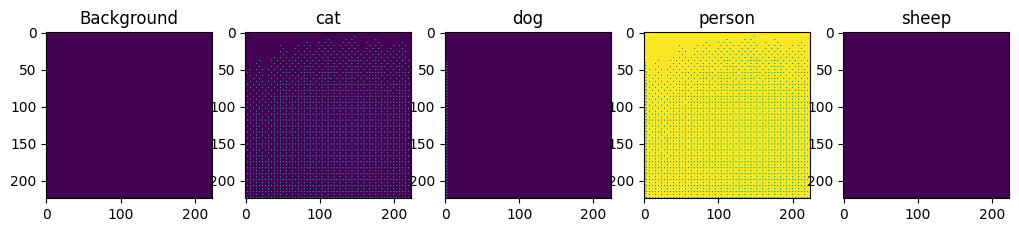

46/46 [==============================] - 94s 1s/step - loss: 1.5599 - accuracy: 0.6161 - mean_io_u_1: 0.0413 - val_loss: 911.1819 - val_accuracy: 0.0491 - val_mean_io_u_1: 0.0034
Epoch 2/150
46/46 [==============================] - 40s 879ms/step - loss: 1.1390 - accuracy: 0.7000 - mean_io_u_1: 0.0544 - val_loss: 27.9502 - val_accuracy: 0.2545 - val_mean_io_u_1: 0.0169
Epoch 3/150
46/46 [==============================] - 41s 887ms/step - loss: 1.0347 - accuracy: 0.7100 - mean_io_u_1: 0.0647 - val_loss: 2.1610 - val_accuracy: 0.6924 - val_mean_io_u_1: 0.0349
Epoch 4/150
46/46 [==============================] - 41s 904ms/step - loss: 0.9348 - accuracy: 0.7231 - mean_io_u_1: 0.0823 - val_loss: 2.2976 - val_accuracy: 0.6924 - val_mean_io_u_1: 0.0349
Epoch 5/150
46/46 [==============================] - 41s 888ms/step - loss: 0.8559 - accuracy: 0.7340 - mean_io_u_1: 0.0969 - val_loss: 2.2946 - val_accuracy: 0.6924 - val_mean_io_u_1: 0.0349
Epoch 6/150
46/46 [==============================] -

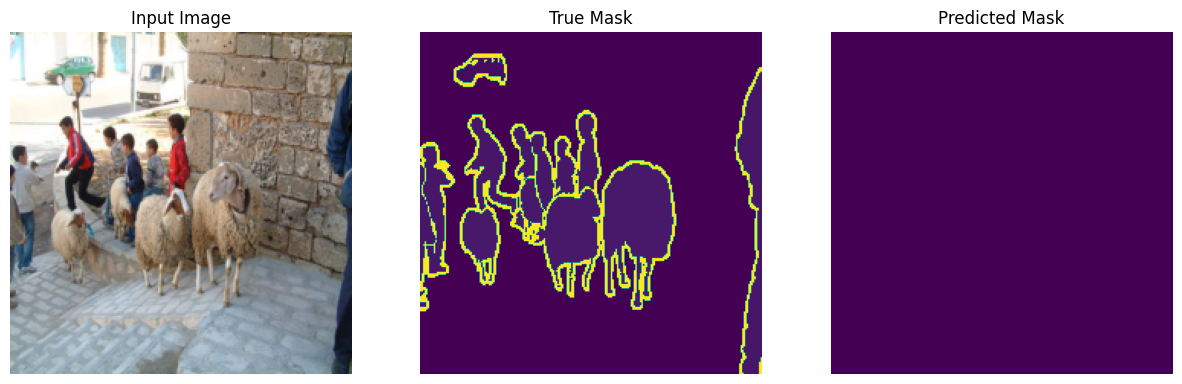

classes in pred = {0}


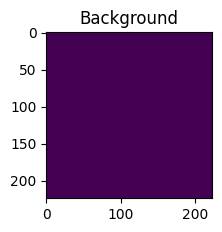

46/46 [==============================] - 43s 945ms/step - loss: 0.5841 - accuracy: 0.7782 - mean_io_u_1: 0.1932 - val_loss: 2.2608 - val_accuracy: 0.6914 - val_mean_io_u_1: 0.0355
Epoch 12/150
46/46 [==============================] - 41s 889ms/step - loss: 0.5485 - accuracy: 0.7845 - mean_io_u_1: 0.2164 - val_loss: 2.4848 - val_accuracy: 0.6912 - val_mean_io_u_1: 0.0354
Epoch 13/150
46/46 [==============================] - 41s 889ms/step - loss: 0.5500 - accuracy: 0.7828 - mean_io_u_1: 0.2217 - val_loss: 2.3872 - val_accuracy: 0.6818 - val_mean_io_u_1: 0.0365
Epoch 14/150
46/46 [==============================] - 41s 887ms/step - loss: 0.5216 - accuracy: 0.7917 - mean_io_u_1: 0.2491 - val_loss: 2.0285 - val_accuracy: 0.6801 - val_mean_io_u_1: 0.0383
Epoch 15/150
46/46 [==============================] - 41s 889ms/step - loss: 0.4619 - accuracy: 0.8070 - mean_io_u_1: 0.2928 - val_loss: 1.9172 - val_accuracy: 0.6012 - val_mean_io_u_1: 0.0436
Epoch 16/150
46/46 [============================

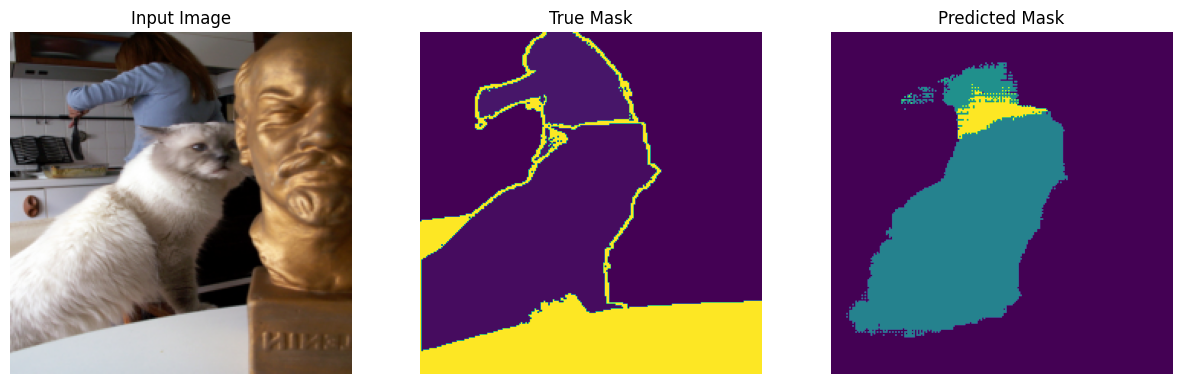

classes in pred = {0, 8, 9, 11, 15, 18}


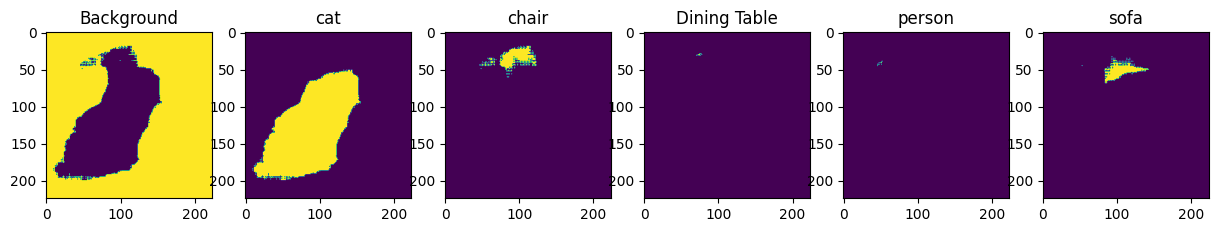

46/46 [==============================] - 43s 938ms/step - loss: 0.3000 - accuracy: 0.8541 - mean_io_u_1: 0.4676 - val_loss: 1.2110 - val_accuracy: 0.7174 - val_mean_io_u_1: 0.1157
Epoch 22/150
46/46 [==============================] - 40s 863ms/step - loss: 0.2785 - accuracy: 0.8617 - mean_io_u_1: 0.5054 - val_loss: 1.1199 - val_accuracy: 0.7228 - val_mean_io_u_1: 0.1554
Epoch 23/150
46/46 [==============================] - 41s 894ms/step - loss: 0.2656 - accuracy: 0.8650 - mean_io_u_1: 0.5176 - val_loss: 1.0379 - val_accuracy: 0.7307 - val_mean_io_u_1: 0.1671
Epoch 24/150
46/46 [==============================] - 40s 874ms/step - loss: 0.2379 - accuracy: 0.8743 - mean_io_u_1: 0.5642 - val_loss: 1.1298 - val_accuracy: 0.7284 - val_mean_io_u_1: 0.1681
Epoch 25/150
46/46 [==============================] - 41s 899ms/step - loss: 0.2274 - accuracy: 0.8774 - mean_io_u_1: 0.5818 - val_loss: 1.1257 - val_accuracy: 0.7223 - val_mean_io_u_1: 0.1588
Epoch 26/150
46/46 [============================

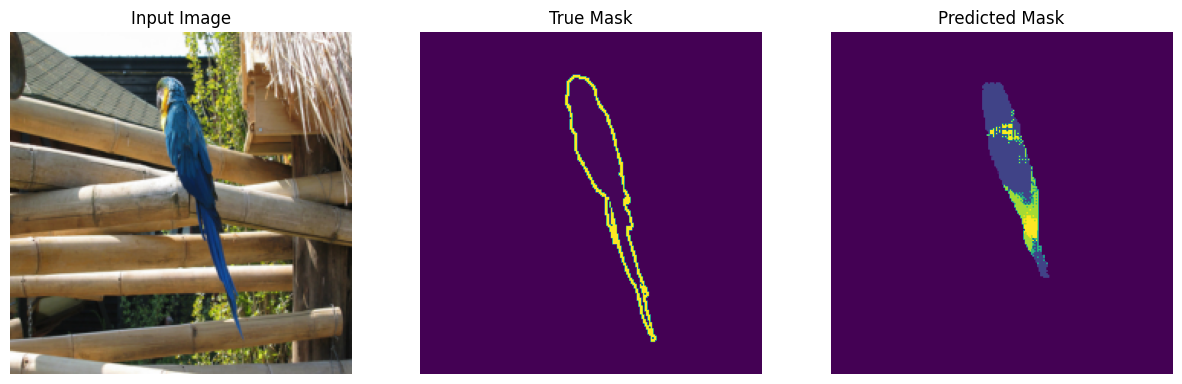

classes in pred = {0, 1, 2, 3, 10, 13, 14, 15}


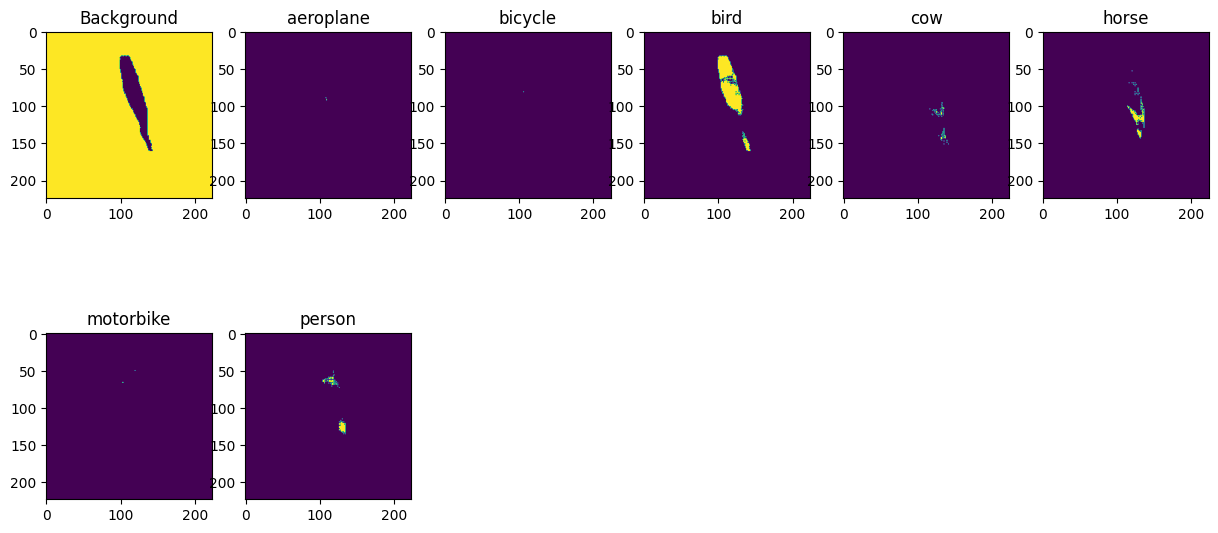

46/46 [==============================] - 43s 941ms/step - loss: 0.1150 - accuracy: 0.9137 - mean_io_u_1: 0.7867 - val_loss: 1.0178 - val_accuracy: 0.7603 - val_mean_io_u_1: 0.2208
Epoch 32/150
46/46 [==============================] - 41s 884ms/step - loss: 0.0975 - accuracy: 0.9192 - mean_io_u_1: 0.8251 - val_loss: 1.0814 - val_accuracy: 0.7488 - val_mean_io_u_1: 0.2041
Epoch 33/150
46/46 [==============================] - 41s 888ms/step - loss: 0.0865 - accuracy: 0.9221 - mean_io_u_1: 0.8465 - val_loss: 1.0915 - val_accuracy: 0.7433 - val_mean_io_u_1: 0.2038
Epoch 34/150
46/46 [==============================] - 41s 889ms/step - loss: 0.0827 - accuracy: 0.9228 - mean_io_u_1: 0.8535 - val_loss: 1.1339 - val_accuracy: 0.7460 - val_mean_io_u_1: 0.2016
Epoch 35/150
46/46 [==============================] - 41s 890ms/step - loss: 0.0717 - accuracy: 0.9261 - mean_io_u_1: 0.8749 - val_loss: 1.0172 - val_accuracy: 0.7551 - val_mean_io_u_1: 0.2302
Epoch 36/150
46/46 [============================

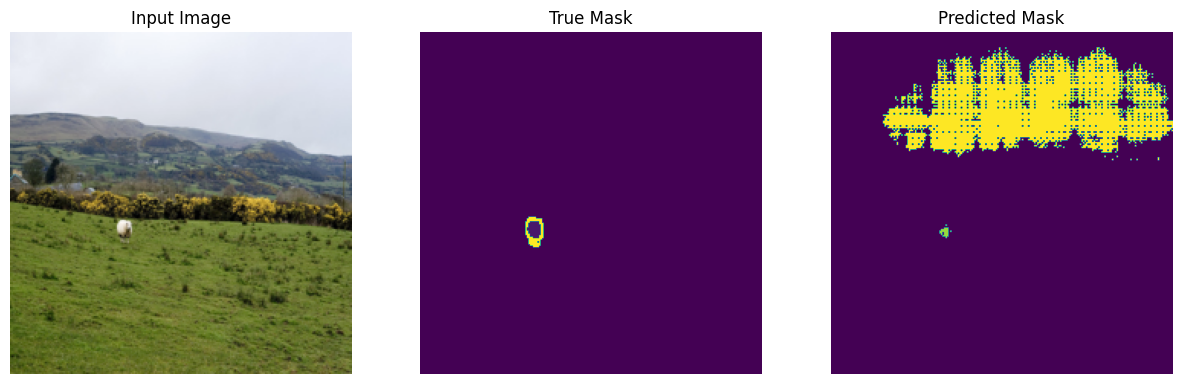

classes in pred = {0, 17, 20}


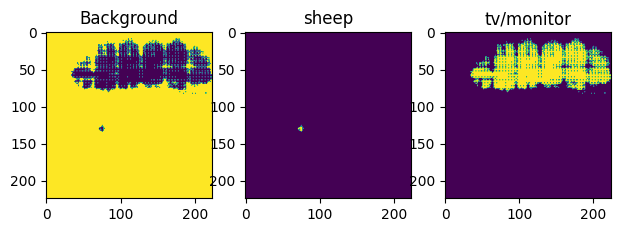

46/46 [==============================] - 44s 954ms/step - loss: 0.2068 - accuracy: 0.8854 - mean_io_u_1: 0.6686 - val_loss: 2.0945 - val_accuracy: 0.5553 - val_mean_io_u_1: 0.1175
Epoch 42/150
46/46 [==============================] - 41s 891ms/step - loss: 0.2148 - accuracy: 0.8834 - mean_io_u_1: 0.6562 - val_loss: 1.3773 - val_accuracy: 0.6978 - val_mean_io_u_1: 0.1622


In [ ]:

model_history = model.fit(Train, epochs=EPOCHS,
						validation_data=Val, callbacks=[CustomCallback(),Early_Stopping])

1/1 [==============================] - 0s 44ms/step


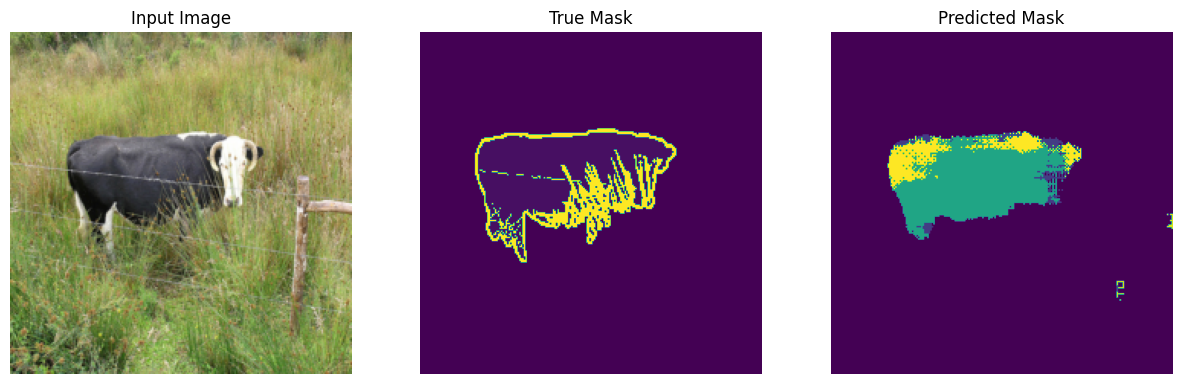

classes in pred = {0, 3, 4, 10, 16, 17}


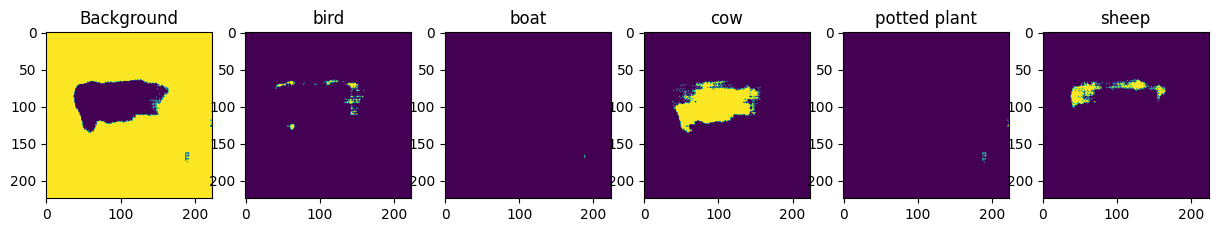

In [ ]:
show_predictions(Val)

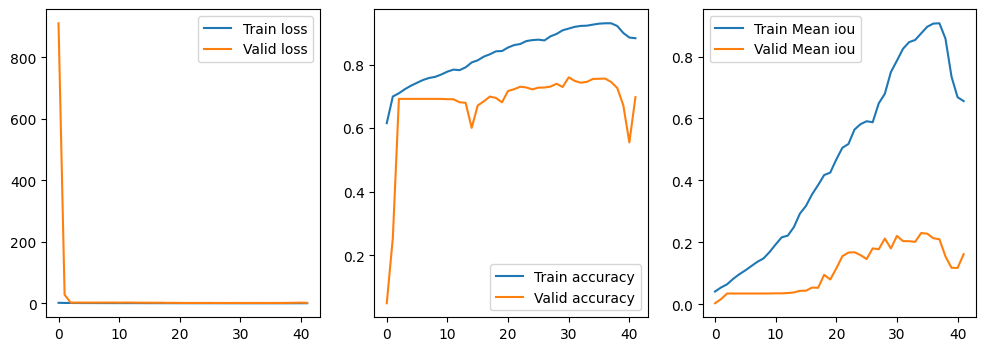

In [ ]:
model_summary(model_history,2)